<a href="https://colab.research.google.com/github/vkp250502/Technical-Indicators-in-Stock-Market-Analysis/blob/main/Share_India_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technical Analysis in Python: SMA, EMA, ADX, Supertrend**

In [1]:
#Importing some important library
import numpy as  np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))

<Figure size 2000x700 with 0 Axes>

<Figure size 2000x700 with 0 Axes>

In [11]:
ticker = "TATAPOWER.NS"
tata_power_df = yf.download(ticker, start="2023-06-30", end="2024-06-30")

[*********************100%***********************]  1 of 1 completed


In [12]:
tata_power_df.columns = tata_power_df.columns.get_level_values(0)
tata_power_df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-06-30,220.827301,221.474299,217.841131,218.687203,9940002
2023-07-03,220.877060,223.166460,220.578455,221.872450,5792956
2023-07-04,219.632828,222.270621,219.184905,221.076156,4598056
2023-07-05,220.677979,222.718531,219.533286,219.931436,5879342
2023-07-06,228.541580,229.238350,222.519467,223.962780,30885511


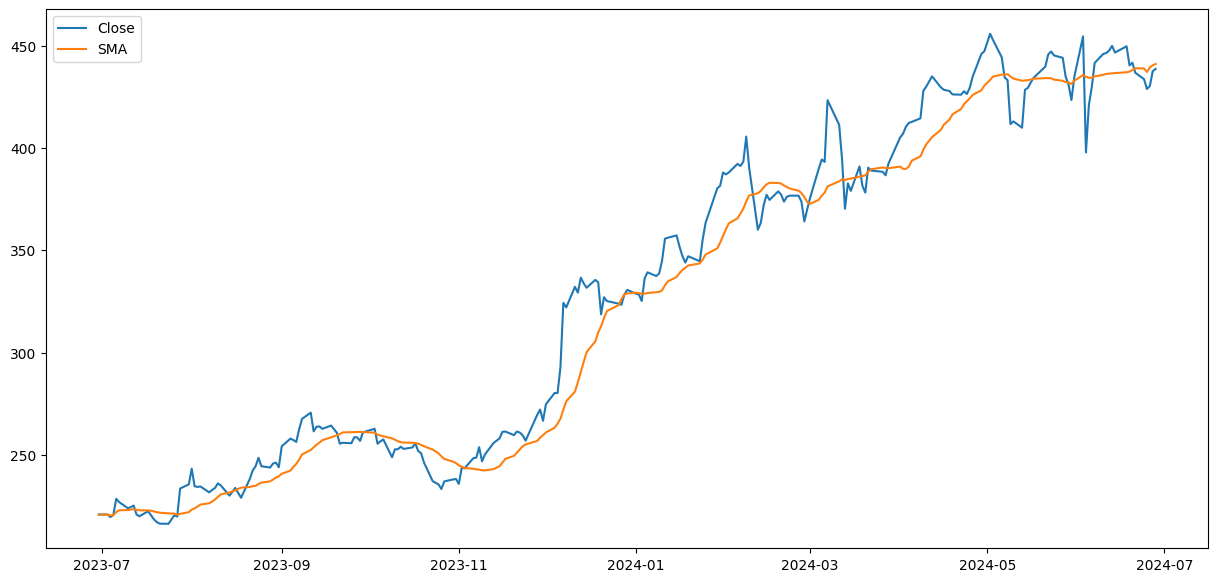

In [13]:
#calculating SMA (Simple moving average)

def sma(data, period):
    sma = data['Close'].rolling(window=period,min_periods=1).mean()
    return sma

tata_power_df['SMA'] = sma(tata_power_df,15)



plt.figure(figsize=(15, 7))
plt.plot(tata_power_df['Close'], label='Close')
plt.plot(tata_power_df['SMA'], label='SMA')
plt.legend()
plt.show()

# Apply the EMA Formula:
The EMA for subsequent periods is calculated using the formula:
EMA stands for Exponential Moving Average.

It is a type of moving average that places a greater weight and significance on the most recent data points.



EMA
today
=
(
Close
today
−
EMA
yesterday
)
×
Multiplier
+
EMA
yesterday


Multiplier= 2/n+1

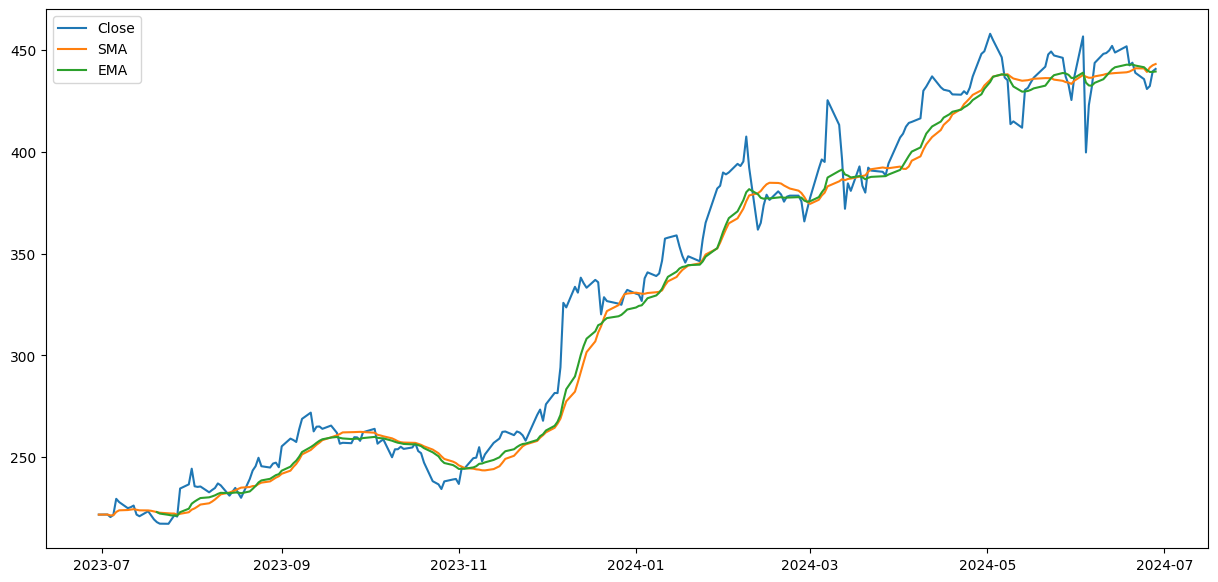

In [ ]:
# Function to calculate EMA using lambda
def calculate_ema(data, window):
    sma = data['Close'].rolling(window=window).mean().iloc[window-1]
    ema = pd.Series(index=data.index, dtype=float)
    ema.iloc[window-1] = sma
    multiplier = 2 / (window + 1)
    ema_lambda = lambda x, y: ((x - y) * multiplier) + y

    for i in range(window, len(data)):
        ema.iloc[i] = ema_lambda(data['Close'].iloc[i], ema.iloc[i-1])

    return ema

# Calculate the 15-day EMA
tata_power_df['EMA'] = calculate_ema(tata_power_df, window=15)

plt.figure(figsize=(15, 7))
plt.plot(tata_power_df['Close'], label='Close')
plt.plot(tata_power_df['SMA'], label='SMA')
plt.plot(tata_power_df['EMA'], label='EMA')
plt.legend()
plt.show()


**The ADX (Average Directional Index) is a powerful technical indicator used to measure the strength of a trend, not its direction.**

In [ ]:
# Calculating the ADX
# calculate TR(True Range)
def calculate_tr(data):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift(1))
    low_close = np.abs(data['Low'] - data['Close'].shift(1))
    tr = np.maximum(high_low, np.maximum(high_close, low_close))
    return tr

tata_power_df['TR'] = calculate_tr(tata_power_df)

#Calculate Directional Movement (+DM and -DM)
def calculate_dm(data):
    up_move = data['High'].diff()
    down_move = data['Low'].diff()

    plus_dm = np.where((up_move > down_move) & (up_move > 0), up_move, 0)
    minus_dm = np.where((down_move > up_move) & (down_move > 0), down_move, 0)

    return plus_dm, minus_dm

tata_power_df['+DM'], tata_power_df['-DM'] = calculate_dm(tata_power_df)


#Calculate Smoothed Moving Average of TR, +DM, and -DM
def smoothed_moving_average(values, window):
    return values.rolling(window=window, min_periods=1).mean()

window = 15
tata_power_df['ATR'] = smoothed_moving_average(tata_power_df['TR'], window)
tata_power_df['+DM_smoothed'] = smoothed_moving_average(tata_power_df['+DM'], window)
tata_power_df['-DM_smoothed'] = smoothed_moving_average(tata_power_df['-DM'], window)

#Calculate Directional Indicators (+DI and -DI)
tata_power_df['+DI'] = 100 * (tata_power_df['+DM_smoothed'] / tata_power_df['ATR'])
tata_power_df['-DI'] = 100 * (tata_power_df['-DM_smoothed'] / tata_power_df['ATR'])

#Calculate Directional index (DX)
tata_power_df['DX'] = 100 * np.abs((tata_power_df['+DI'] - tata_power_df['-DI']) / (tata_power_df['+DI'] + tata_power_df['-DI']))

#Calculate ADX
tata_power_df['ADX'] = smoothed_moving_average(tata_power_df['DX'], window)



In [ ]:
tata_power_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,TR,+DM,-DM,ATR,+DM_smoothed,-DM_smoothed,+DI,-DI,DX,ADX
Date,,,,,,,,,,,,,,,,,,
2023-06-30,219.699997,222.500000,218.850006,221.850006,221.850006,9940002,221.850006,NaN,NaN,0.000000,0.00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2023-07-03,222.899994,224.199997,221.600006,221.899994,221.899994,5792956,221.875000,NaN,2.599991,0.000000,2.75,2.599991,0.000000,1.375000,0.000000,52.884802,100.000000,100.000000
2023-07-04,222.100006,223.300003,220.199997,220.649994,220.649994,4598056,221.466665,NaN,3.100006,0.000000,0.00,2.849998,0.000000,0.916667,0.000000,32.163760,100.000000,100.000000
2023-07-05,220.949997,223.750000,220.550003,221.699997,221.699997,5879342,221.524998,NaN,3.199997,0.449997,0.00,2.966665,0.112499,0.687500,3.792112,23.174173,71.875164,90.625055
2023-07-06,225.000000,230.300003,223.550003,229.600006,229.600006,30885511,223.139999,NaN,8.600006,6.550003,0.00,4.375000,1.400000,0.550000,32.000000,12.571429,43.589744,78.866227


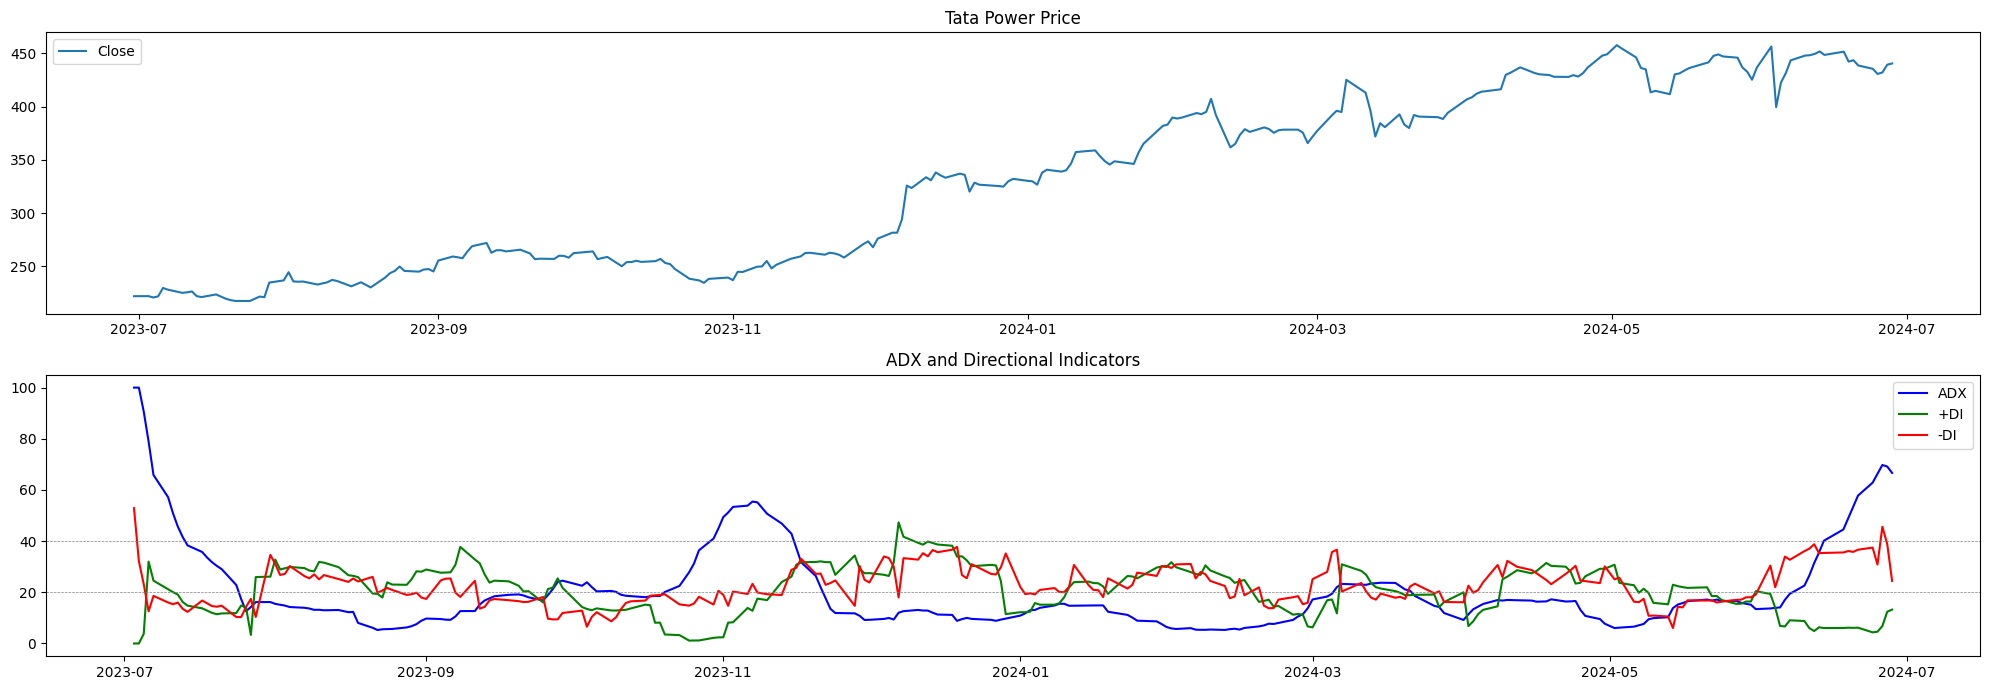

In [ ]:
# Plot Closing Price
plt.figure(figsize=(20, 7))
plt.subplot(2, 1, 1)
plt.plot(tata_power_df['Close'], label='Close')
plt.title('Tata Power Price')
plt.legend()

# Plot ADX, +DI, -DI
plt.subplot(2, 1, 2)
plt.plot(tata_power_df['ADX'], label='ADX', color='blue')
plt.plot(tata_power_df['+DI'], label='+DI', color='green')
plt.plot(tata_power_df['-DI'], label='-DI', color='red')
plt.axhline(20, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(40, color='gray', linestyle='--', linewidth=0.5)
plt.title('ADX and Directional Indicators')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # Create a simple DataFrame
# data = pd.DataFrame({
#     'A': [10, 20, 15, 40, 35],
#     'B': [5, 10, 7, 25, 12]})
# data['adx']= data['A'] - data['B'].shift(1)

# data["up_move"] = data['A'].diff()
# data['down_move'] = data['B'].diff()


# data['plus_dm'] = np.where((data['up_move'] > data['down_move']) & (data['up_move'] > 0), data['up_move'], 0)
# #data['minus_dm'] = np.where((down_move > up_move) & (down_move > 0), -down_move, 0)

# data['A'].rolling(window=4,min_periods=3).mean()

The Supertrend indicator is a trend-following indicator that signals the direction of the trend and helps identify potential buy or sell signals. It is often used in technical analysis to determine the price direction and is effective in trending markets. The indicator is plotted on the price chart, and it switches between two colors (usually green and red) to signal bullish or bearish trends.

##Key Concepts of Supertrend
Trend Direction: The Supertrend indicator changes its position relative to the price to indicate the trend direction. When the price is above the Supertrend line, it indicates an uptrend, and when the price is below the Supertrend line, it indicates a downtrend.

ATR-Based Calculation: The Supertrend indicator is based on the Average True Range (ATR) to calculate its value. The ATR is a measure of volatility, and it is used to determine the distance between the Supertrend line and the price.

Calculation of Supertrend
The Supertrend indicator is calculated as follows:

Basic Upper Band and Lower Band:

Upper Band: (High+low)/2 + multiplier* ATR

Lower Band : (High+low)/2 - multiplier* ATR

Final Supertrend Line:

In an uptrend, the Supertrend line is the lower band as long as the closing price does not cross below it.

In a downtrend, the Supertrend line is the upper band as long as the closing price does not cross above it.

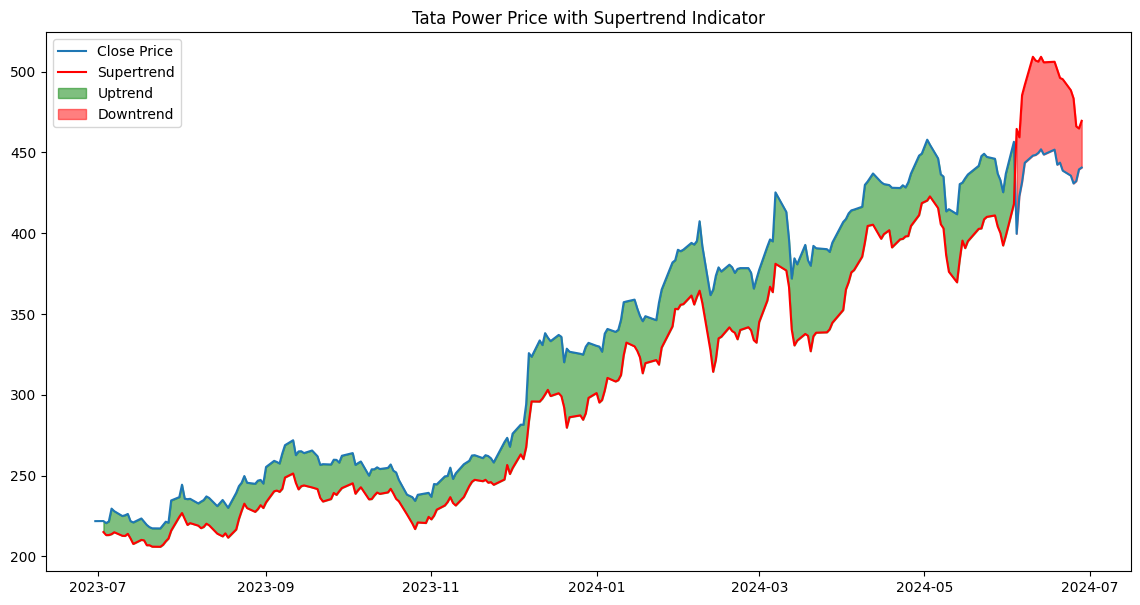

In [ ]:
# Calculate Supertrend
def calculate_supertrend(data, multiplier):
    hl2 = (data['High'] + data['Low']) / 2
    upperband = hl2 + (multiplier * data['ATR'])
    lowerband = hl2 - (multiplier * data['ATR'])

    supertrend = [np.nan] * len(data)
    in_uptrend = True

    for i in range(1, len(data)):
        if data['Close'][i] > upperband[i-1]:
            in_uptrend = True
        elif data['Close'][i] < lowerband[i-1]:
            in_uptrend = False

        if in_uptrend:
            supertrend[i] = lowerband[i]
        else:
            supertrend[i] = upperband[i]

    return pd.Series(supertrend, index=data.index)

multiplier = 3
tata_power_df['Supertrend'] = calculate_supertrend(tata_power_df, multiplier)



# Plot Closing Price and Supertrend
plt.figure(figsize=(14, 7))
plt.plot(tata_power_df['Close'], label='Close Price')
plt.plot(tata_power_df['Supertrend'], label='Supertrend', color='red')
plt.fill_between(tata_power_df.index, tata_power_df['Supertrend'], tata_power_df['Close'],
                 where=tata_power_df['Close'] >= tata_power_df['Supertrend'],
                 color='green', alpha=0.5, label='Uptrend')
plt.fill_between(tata_power_df.index, tata_power_df['Supertrend'], tata_power_df['Close'],
                 where=tata_power_df['Close'] < tata_power_df['Supertrend'],
                 color='red', alpha=0.5, label='Downtrend')

plt.title('Tata Power Price with Supertrend Indicator')
plt.legend()
plt.show()
